In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('merged_data_removed_cols.csv')

In [ ]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,acousticness
0,622652,Five For Fighting,Easy Tonight,57PHqrPsX6E7OX9LeKSo9Q,37,2000,acoustic,0.470,0.2590
1,622653,Stephen Speaks,Passenger Seat,67E65R1XMIKCzRrJ3pC5IS,54,2000,acoustic,0.550,0.0237
2,622654,Chris Smither,No Love Today,6KmJfZCd5f4P11vuglbIrN,34,2000,acoustic,0.557,0.8490
3,622655,Chris Smither,Link Of Chain,16N2lpCidTNYdNq2YZhE98,35,2000,acoustic,0.445,0.8830
4,622656,Bob Schneider,Big Blue Sea,4maIlg3dss7yA23mBdTYdM,27,2000,acoustic,0.671,0.5540


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0    1048575 non-null  int64  
 1   artist_name   1048560 non-null  object 
 2   track_name    1048542 non-null  object 
 3   track_id      1048575 non-null  object 
 4   popularity    1048575 non-null  int64  
 5   year          1048575 non-null  int64  
 6   genre         1048575 non-null  object 
 7   danceability  1048575 non-null  float64
 8   acousticness  1048575 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 72.0+ MB


- Dữ liệu có 9 cột:
>- `Unnamed: 0`, `popularity`, `year` thuộc kiểu dữ liệu `int64`
>- `artist_name`, `track_name`, `track_id`, `genre` thuộc kiểu `object`
>- `danceability`, `acousticness` thuộc kiểu dữ liệu `float64`

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'acousticness'],
      dtype='object')

In [ ]:
df.isnull().sum()

artist_name     15
track_name      33
track_id         0
popularity       0
year             0
genre            0
danceability     0
acousticness     0
dtype: int64

- Có 2 cột bị thiếu giá trị là: `artist_name`(15), `track_name`(33) => vì dữ liệu bị thiếu rất ít so với tập dữ liệu nên ta sẽ `xóa` các giá trị này đi.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

artist_name     0
track_name      0
track_id        0
popularity      0
year            0
genre           0
danceability    0
acousticness    0
dtype: int64

In [ ]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,acousticness
0,Five For Fighting,Easy Tonight,57PHqrPsX6E7OX9LeKSo9Q,37,2000,acoustic,0.470,0.2590
1,Stephen Speaks,Passenger Seat,67E65R1XMIKCzRrJ3pC5IS,54,2000,acoustic,0.550,0.0237
2,Chris Smither,No Love Today,6KmJfZCd5f4P11vuglbIrN,34,2000,acoustic,0.557,0.8490
3,Chris Smither,Link Of Chain,16N2lpCidTNYdNq2YZhE98,35,2000,acoustic,0.445,0.8830
4,Bob Schneider,Big Blue Sea,4maIlg3dss7yA23mBdTYdM,27,2000,acoustic,0.671,0.5540


In [ ]:
df.groupby('year').size().reset_index().rename(columns={0:'number'})

,year,number
0,2000,44034
1,2001,42339
2,2002,42100
3,2003,42368
4,2004,43390
5,2005,43779
6,2006,45474
7,2007,46001
8,2008,47431
9,2009,28992


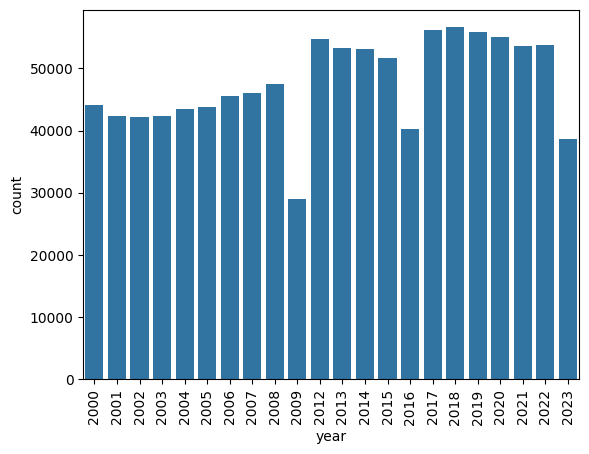

In [ ]:
# Số lượng bài hát qua các năm
sns.countplot(data=df, x = 'year')
plt.xticks(rotation = 90);

- Năm có số bài hát được ra ít nhất là năm 2009.
- Năm có số bài hát được ra nhiều nhất là năm 2018.
- Hầu hết các năm đều có hơn 40k bài hát, có 3 năm số lượng bài hát ít hơn 40k là 2009, 2016, 2023.

In [ ]:
df[df['year'] < 2010]['genre'].value_counts().reset_index().rename(columns = {'index': 'genre', 'genre': 'number'})[:10]

,genre,number
0,ambient,9367
1,gospel,8932
2,black-metal,8757
3,alt-rock,8598
4,emo,8572
5,acoustic,8275
6,classical,8149
7,french,8133
8,forro,8079
9,blues,7898


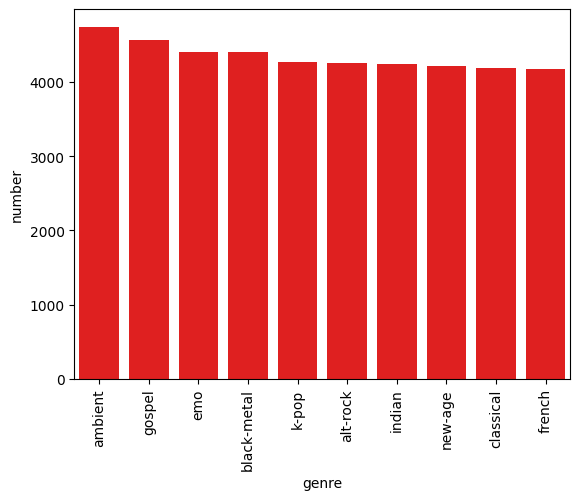

In [ ]:
sns.barplot(data=df[(df['year'] >= 2000) & (df['year'] < 2005)]['genre'].value_counts().reset_index().rename(columns={'index': 'genre', 'genre': 'number'})[:10],
            x='genre',
            y='number',
            color='red')
plt.xticks(rotation=90)
plt.show()

- Từ năm 2000 -> 2004:
>- Thể loại `gospel` đứng thứ 2 trong top 10 thịnh hành
>- Thể loại nhạc thịnh hành nhất là `ambient`

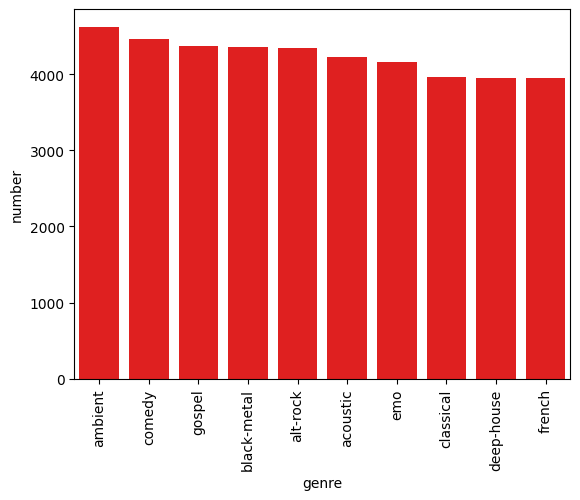

In [ ]:
sns.barplot(data=df[(df['year'] >= 2005) & (df['year'] < 2011)]['genre'].value_counts().reset_index().rename(columns={'index': 'genre', 'genre': 'number'})[:10],
            x='genre',
            y='number',
            color='red')
plt.xticks(rotation=90)
plt.show()

- Từ năm 2005 -> 2010:
>- Thể loại nhạc `gospel` đứng thứ 3 trong top 10
>- Thể loại nhạc thịnh hành nhất là `ambient`


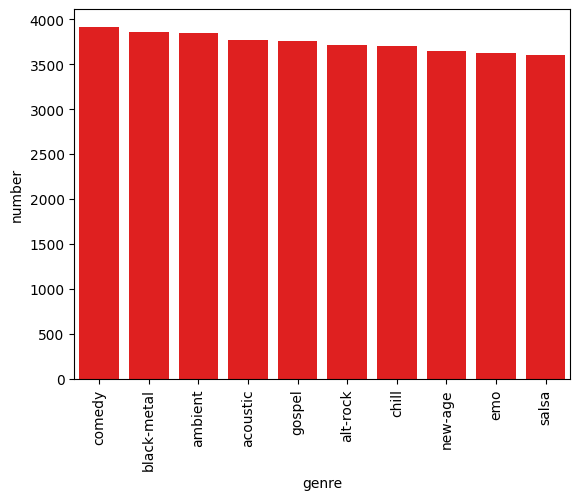

In [ ]:
sns.barplot(data=df[(df['year'] >= 2011) & (df['year'] < 2016)]['genre'].value_counts().reset_index().rename(columns={'index': 'genre', 'genre': 'number'})[:10],
            x='genre',
            y='number',
            color='red')
plt.xticks(rotation=90)
plt.show()

- Từ năm 2011 -> 2015:
>- Thể loại nhạc `gospel` đứng thứ 5
>- Thể loại nhạc thịnh hành nhất là `ambient`

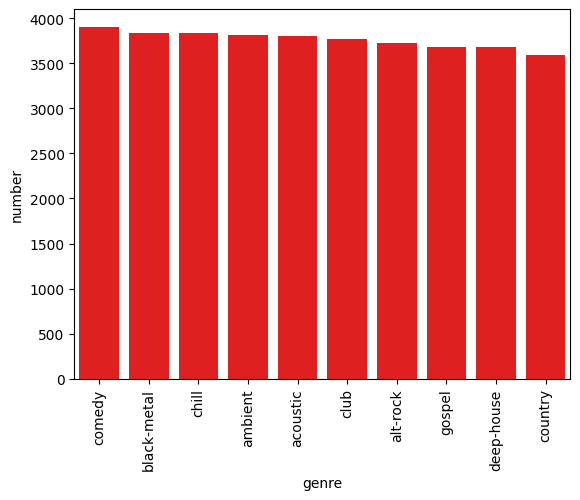

In [ ]:
sns.barplot(data=df[(df['year'] >= 2016) & (df['year'] < 2020)]['genre'].value_counts().reset_index().rename(columns={'index': 'genre', 'genre': 'number'})[:10],
            x='genre',
            y='number',
            color='red')
plt.xticks(rotation=90)
plt.show()

- Từ năm 2016 -> 2020:
>- Thể loại nhạc `gospel` đứng thứ 8
>- Thể loại nhạc thịnh hành nhất là `black-metal`